In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_excel("per capita of states.xlsx")

In [3]:
df.head()

,S. No.,States,2020-21,2021-22,GDP,Population,Multidimensional Poverty Index
0,1,Andhra Pradesh,163746,192587.0,14.490,53156000,0.0606
1,2,Arunachal Pradesh,190212,215897.0,0.378,1562000,0.1376
2,3,Assam,90482,102965.0,5.500,35713000,0.1935
3,4,Bihar,43605,49470.0,8.590,126756000,0.3376
4,5,Chhattisgarh,104788,120704.0,5.090,30180000,0.1637


In [4]:
# multiplying whole column with 100
df["Multidimensional Poverty Index"]=df["Multidimensional Poverty Index"].multiply(100)
df.head()

,S. No.,States,2020-21,2021-22,GDP,Population,Multidimensional Poverty Index
0,1,Andhra Pradesh,163746,192587.0,14.490,53156000,6.06
1,2,Arunachal Pradesh,190212,215897.0,0.378,1562000,13.76
2,3,Assam,90482,102965.0,5.500,35713000,19.35
3,4,Bihar,43605,49470.0,8.590,126756000,33.76
4,5,Chhattisgarh,104788,120704.0,5.090,30180000,16.37


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   S. No.                          33 non-null     int64  
 1   States                          33 non-null     object 
 2   2020-21                         33 non-null     int64  
 3   2021-22                         32 non-null     float64
 4    GDP                            33 non-null     float64
 5   Population                      33 non-null     int64  
 6   Multidimensional Poverty Index  33 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 1.9+ KB


In [6]:
df.describe()

,S. No.,2020-21,2021-22,GDP,Population,Multidimensional Poverty Index
count,33.00000,33.000000,32.000000,33.000000,3.300000e+01,33.000000
mean,17.00000,173227.939394,197073.250000,9.492091,4.201618e+07,10.749091
std,9.66954,92382.777541,107217.199483,10.322092,5.092867e+07,8.695203
min,1.00000,43605.000000,49470.000000,0.090000,4.030000e+05,0.550000
25%,9.00000,103654.000000,121371.500000,0.466000,3.223000e+06,4.750000
50%,17.00000,183333.000000,190713.000000,5.500000,3.020900e+07,7.810000
75%,25.00000,212174.000000,243373.250000,14.490000,6.769200e+07,15.430000
max,33.00000,431351.000000,472543.000000,38.800000,2.356870e+08,33.760000


In [7]:
#dropping unwanted column
df.drop("S. No.",axis=1,inplace=True)

In [8]:
df.head()

,States,2020-21,2021-22,GDP,Population,Multidimensional Poverty Index
0,Andhra Pradesh,163746,192587.0,14.490,53156000,6.06
1,Arunachal Pradesh,190212,215897.0,0.378,1562000,13.76
2,Assam,90482,102965.0,5.500,35713000,19.35
3,Bihar,43605,49470.0,8.590,126756000,33.76
4,Chhattisgarh,104788,120704.0,5.090,30180000,16.37


In [9]:
df.isnull().sum()

States                            0
2020-21                           0
2021-22                           1
 GDP                              0
Population                        0
Multidimensional Poverty Index    0
dtype: int64

In [10]:
df.rename(columns={"2021-22":"Per Capita Income 2021-2022"},inplace=True)
df.rename(columns={" GDP":"GDP"},inplace=True)

In [11]:
df["Per Capita Income 2021-2022"].fillna(df["2020-21"]+30000,inplace=True)

In [12]:
df.columns

Index(['States', '2020-21', 'Per Capita Income 2021-2022', 'GDP', 'Population',
       'Multidimensional Poverty Index'],
      dtype='object')

In [13]:
#Sorting the data 
g=df.sort_values(by="GDP",ascending=False)
print(g)


                       States  2020-21  Per Capita Income 2021-2022     GDP  \
13                Maharashtra   183704                     215233.0  38.800   
22                 Tamil Nadu   212174                     241131.0  28.300   
6                     Gujarat   212821                     250100.0  25.620   
10                  Karnataka   221310                     265623.0  25.000   
25              Uttar Pradesh    61374                      70792.0  24.390   
30                      Delhi   331112                     389529.0  23.000   
27                West Bengal   106510                     124798.0  17.190   
20                  Rajasthan   115122                     135962.0  15.700   
0              Andhra Pradesh   163746                     192587.0  14.490   
12             Madhya Pradesh   103654                     121594.0  13.870   
23                  Telangana   225687                     265942.0  13.200   
11                     Kerala   194322              

<AxesSubplot:xlabel='States', ylabel='Per Capita Income 2021-2022'>

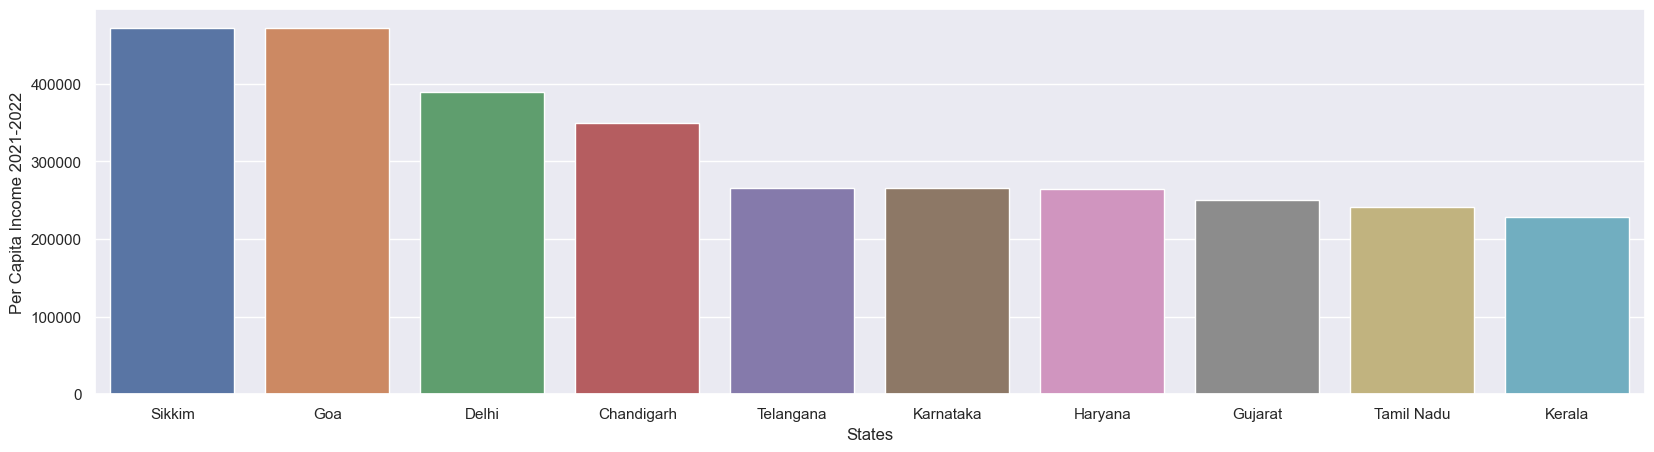

In [14]:
sort=df.sort_values(by="Per Capita Income 2021-2022",ascending=False)
sns.set(rc={"figure.figsize":(20,5)})
sns.barplot(data=sort[:10],x="States",y="Per Capita Income 2021-2022")

<AxesSubplot:xlabel='States', ylabel='GDP'>

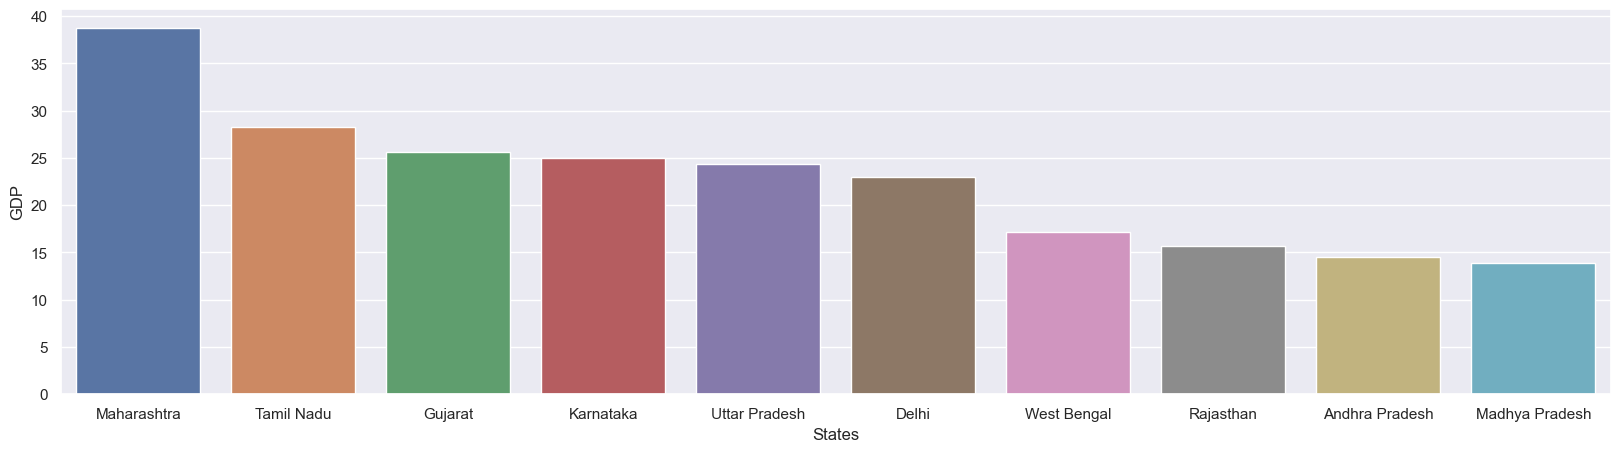

In [15]:
sort2=df.sort_values(by="GDP",ascending=False)
sns.set(rc={"figure.figsize":(20,5)})
sns.barplot(data=sort2[:10],x="States",y="GDP")

In [16]:
o=df.sort_values(by="Population",ascending=False,inplace=True)


            States  2020-21  Per Capita Income 2021-2022    GDP  Population
25   Uttar Pradesh    61374                      70792.0  24.39   235687000
3            Bihar    43605                      49470.0   8.59   126756000
13     Maharashtra   183704                     215233.0  38.80   126385000
27     West Bengal   106510                     124798.0  17.19    99084000
12  Madhya Pradesh   103654                     121594.0  13.87    86579000


<AxesSubplot:ylabel='Population'>

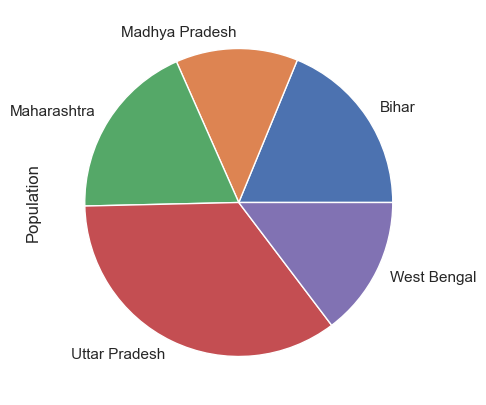

In [17]:
#accesing rows and columns and temporarily storing it in the form of Dataframe
a=df.iloc[0:5, 0:5]
print(a)
#a.head()
a.groupby("States")["Population"].sum().plot(kind="pie")

<AxesSubplot:xlabel='Multidimensional Poverty Index', ylabel='States'>

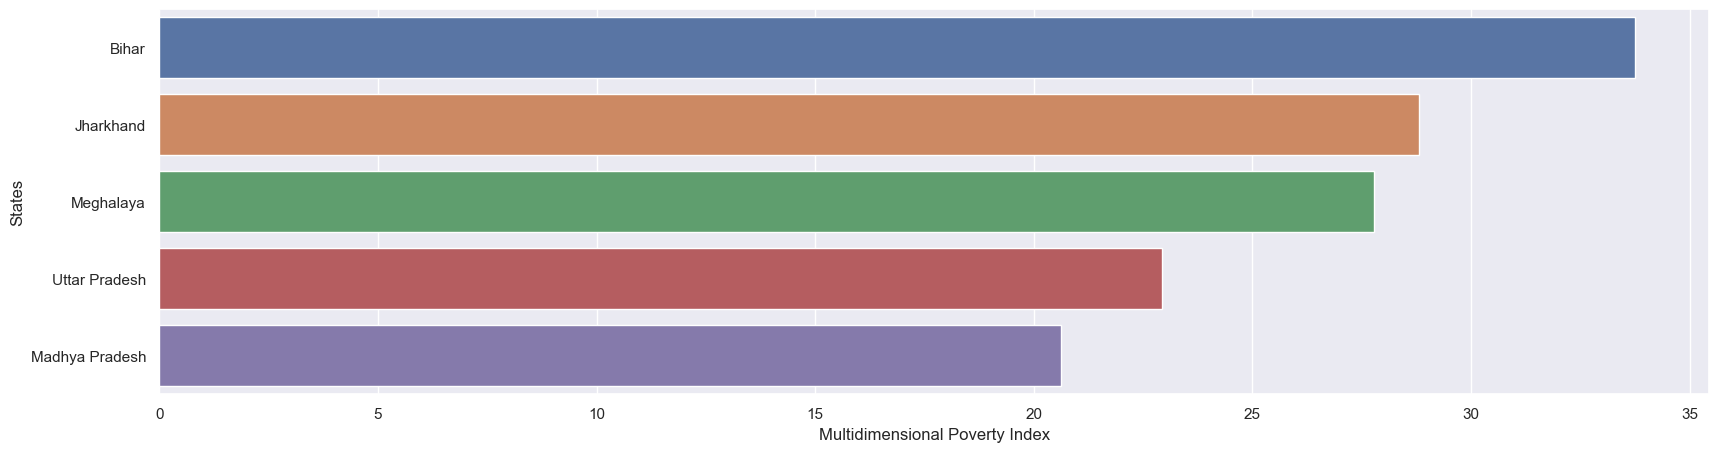

In [26]:
sort3=df.sort_values(by="Multidimensional Poverty Index",ascending=False)
sns.barplot(data=sort3[:5],x="Multidimensional Poverty Index",y="States",orient='h')

<AxesSubplot:xlabel='Multidimensional Poverty Index', ylabel='States'>

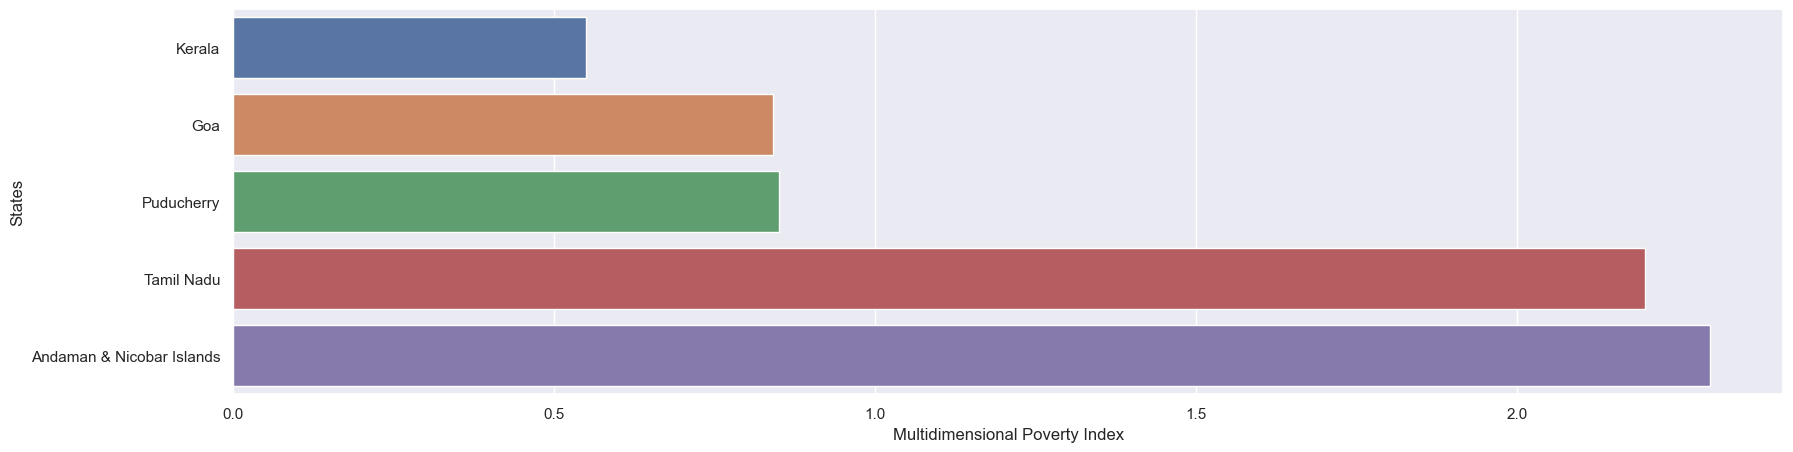

In [24]:
sort3=df.sort_values(by="Multidimensional Poverty Index")
sns.barplot(data=sort3[:5],x="Multidimensional Poverty Index",y="States",orient='h')